In [1]:
import pandas as pd

# **Read data process**

In [2]:
# Read data from train.csv
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(columns=['split'])

# Display 5 first rows of the dataframe
train_data.head(5)

,Unnamed: 0,Message ID,Subject,Message,Spam/Ham
0,0,0,christmas tree farm pictures,NaN,ham
1,1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,3,3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham


In [3]:
# Read data from val.csv
val_data = pd.read_csv('val.csv')
val_data = val_data.drop(columns=['split'])
# Display 5 first rows of the dataframe
val_data.head(5)

,Unnamed: 0,Message ID,Subject,Message,Spam/Ham
0,23,23,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham
1,24,24,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham
2,32,32,valero 8018 and 1394,it is my understanding the outages valero incu...,ham
3,37,37,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham
4,43,43,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham


# **Pre-process data phase**

In [4]:
import re
import nltk

from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Function to clean the text
def clean_regex(m):
    m = re.sub(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$','',str(m)) # email addresses
    m = re.sub(r'(http|https|ftp)://[a-zA-Z0-9\\./]+', ' ', str(m)) # URLs
    m = re.sub(r'\d+', ' ', str(m)) # number
    m = re.sub(r'[^a-zA-Z]', ' ', str(m)) # non alphabet
    m = m.translate(str.maketrans('', '', punctuation)) # punctuation
    m = re.sub(r'\s+', ' ', str(m)) # remove multiple spaces
    m = m.lower() # lower case
    return m

# Function to clean the column
def clean_column(data, col_name):
    # remove email addresses, URLs, numbers, non-alphabets, punctuations, multiple spaces, and lower case
    data[col_name] = data[col_name].apply(clean_regex)

    # remove stopwords
    data[col_name]= data[col_name].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

    # remove words with length less than 3 and more than 15 characters to remove noise
    data[col_name]= data[col_name].apply(lambda x: ' '.join([item for item in x.split() if 3 <= len(item) <= 15]))

    # lemmatization
    lem = WordNetLemmatizer()

    # lemmatize the words into verb form
    data[col_name] = data[col_name].apply(lambda x: ' '.join([lem.lemmatize(word,pos='v') for word in x.split()]))
    # lemmatize the words into noun form
    data[col_name] = data[col_name].apply(lambda x: ' '.join([lem.lemmatize(word,pos='n') for word in x.split()]))

    return data


In [6]:
# Pre-process the data
def pre_process(data):
    data = clean_column(data, 'Message')
    data = clean_column(data, 'Subject')
    return data

train_data = pre_process(train_data)

In [7]:
train_data.head(7)

,Unnamed: 0,Message ID,Subject,Message,Spam/Ham
0,0,0,christmas tree farm picture,nan,ham
1,1,1,vastar resource inc,gary production high island larger block comme...,ham
2,2,2,calpine daily gas nomination,calpine daily gas nomination doc,ham
3,3,3,issue,fyi see note already do stella forward stella ...,ham
4,5,5,mcmullen gas,jackie since inlet river plant shut last day f...,ham
5,6,6,meter jan,george need follow do jan zero receipt package...,ham
6,7,7,dun number change,fyi forward gary payne hou ect antoine pierre ...,ham


In [9]:
# count the number of ham and spam emails

ham_count = train_data[train_data['Spam/Ham'] == 'ham'].shape[0]
spam_count = train_data[train_data['Spam/Ham'] == 'spam'].shape[0]

print('There are {} ham emails and {} spam emails'.format(ham_count, spam_count))

There are 13426 ham emails and 13858 spam emails


In [13]:
# count words in ham and spam emails
from collections import Counter

ham_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'ham']['Message']))
spam_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'spam']['Message']))

ham_words = ham_words.split()
spam_words = spam_words.split() 


ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)


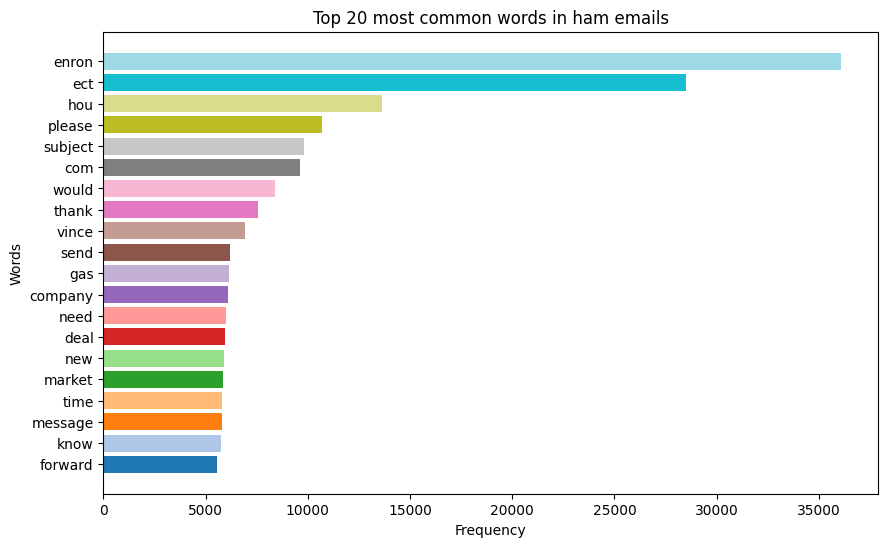

In [26]:
# Visualize the most common words in ham emails
import matplotlib.pyplot as plt
import numpy as np

ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['word', 'frequency'])
ham_word_freq_df = ham_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(ham_word_freq_df['word'], ham_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in ham emails')
plt.show()


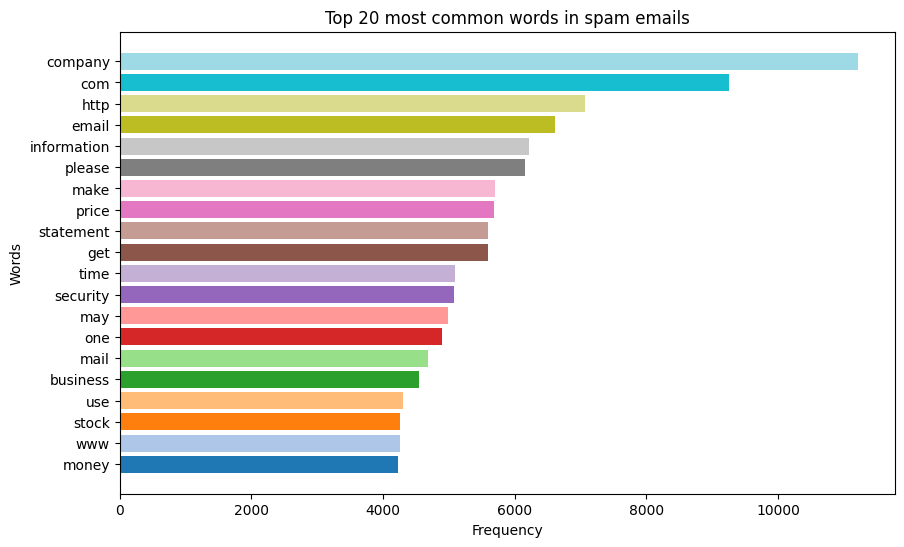

In [27]:
# Visualize the most common words in spam emails

spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['word', 'frequency'])
spam_word_freq_df = spam_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(spam_word_freq_df['word'], spam_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in spam emails')
plt.show()


In [ ]:
# Feature extraction phase using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)
    return tfidf_matrix

# Extract features from the train data
X_train = tfidf(train_data['Message'])
y_train = train_data['Spam/Ham']